In [1]:
from BayesianTypeBasedReasoning import BayesianTypeBasedReasoning
import axelrod as axl

c:\Users\ethan\OneDrive\Desktop\repos\BayesianMARL\.venv\lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [48]:
# policies = [axl.Grudger, axl.Cooperator, axl.TitForTat, axl.Bully, axl.FirstByJoss, axl.Predator]
policies = [axl.Grudger, axl.TitFor2Tats, axl.TitForTat, axl.FirstByJoss, axl.Predator]
for i in range(6):
    agent = BayesianTypeBasedReasoning([policies[i]], num_iter=100, depth=5)
    print(agent.strategy(axl.Grudger()))

C
D
C
C
D


In [49]:
agent = BayesianTypeBasedReasoning(policies, num_iter=100, depth=5)
print(agent.strategy(axl.Grudger()))

C


In [30]:
agent.strategy(axl.Grudger())

D

In [28]:
axl.FirmButFair().strategy(axl.Grudger())

C

In [50]:
players = [agent] + [s() for s in axl.axelrod_first_strategies]

tournament = axl.Tournament(players, repetitions=1)
results = tournament.play(processes=16)
results.ranked_names

Analysing: 100%|██████████| 25/25 [00:00<00:00, 211.88it/s]


["Bayesian Type Based Reasoning: [<class 'axelrod.strategies.grudger.Grudger'>, <class 'axelrod.strategies.titfortat.TitFor2Tats'>, <class 'axelrod.strategies.titfortat.TitForTat'>, <class 'axelrod.strategies.axelrod_first.FirstByJoss'>, <class 'axelrod.strategies.finite_state_machines.Predator'>], 0.05, 100, 5",
 'First by Stein and Rapoport: 0.05: (D, D)',
 'First by Grofman',
 'Tit For Tat',
 'First by Nydegger',
 'First by Shubik',
 'Grudger',
 'First by Tideman and Chieruzzi: (D, D)',
 'First by Davis: 10',
 'First by Graaskamp: 0.05',
 'First by Downing',
 'First by Feld: 1.0, 0.5, 200',
 'First by Tullock',
 'First by Joss: 0.9',
 'Random: 0.5',
 'First by Anonymous']

c:\Users\ethan\OneDrive\Desktop\repos\BayesianMARL\.venv\lib\site-packages\axelrod\plot.py:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\ethan\AppData\Local\Temp\ipykernel_20500\2188283945.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


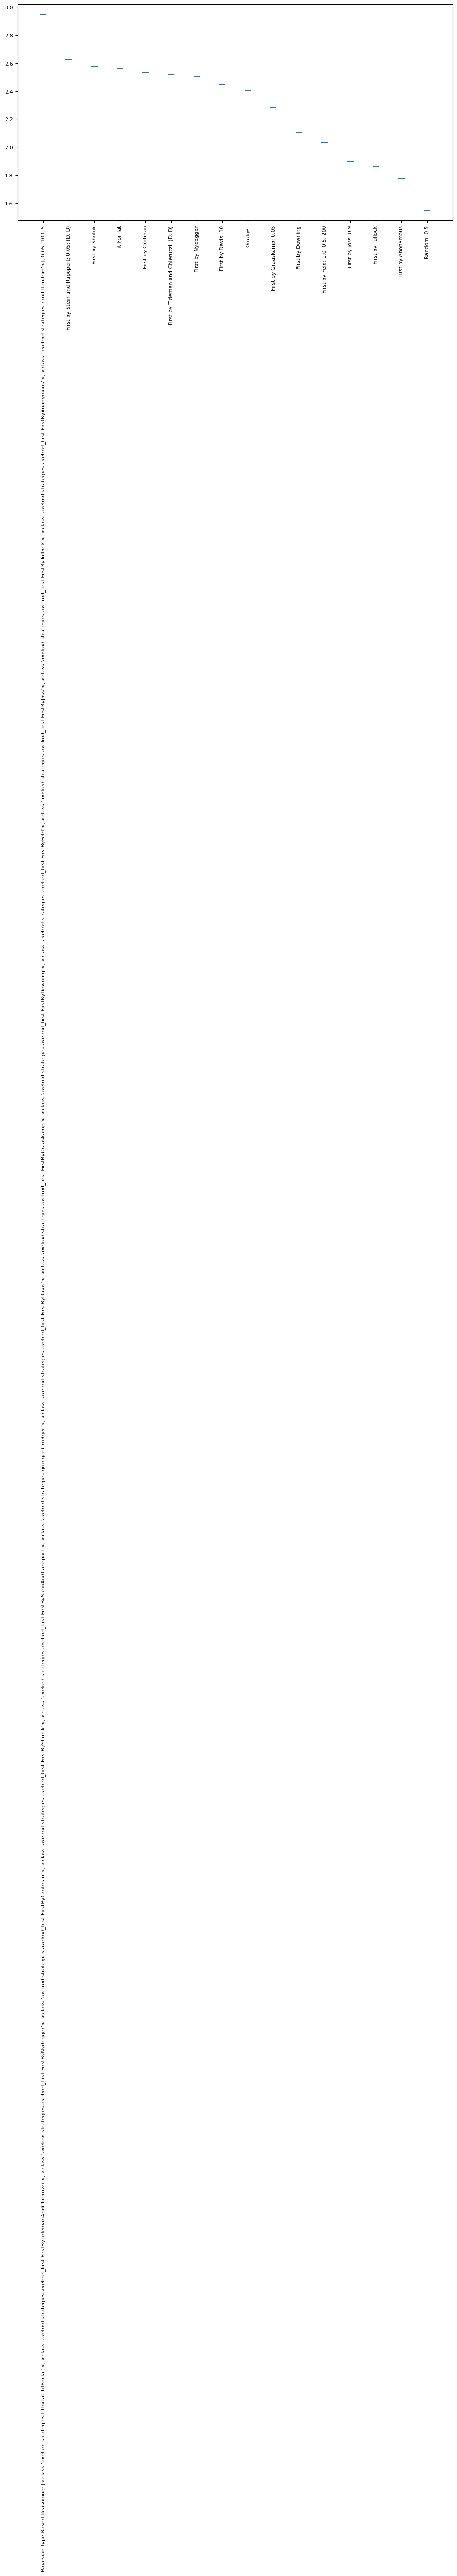

In [22]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

c:\Users\ethan\OneDrive\Desktop\repos\BayesianMARL\.venv\lib\site-packages\axelrod\plot.py:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\ethan\AppData\Local\Temp\ipykernel_2624\2188283945.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


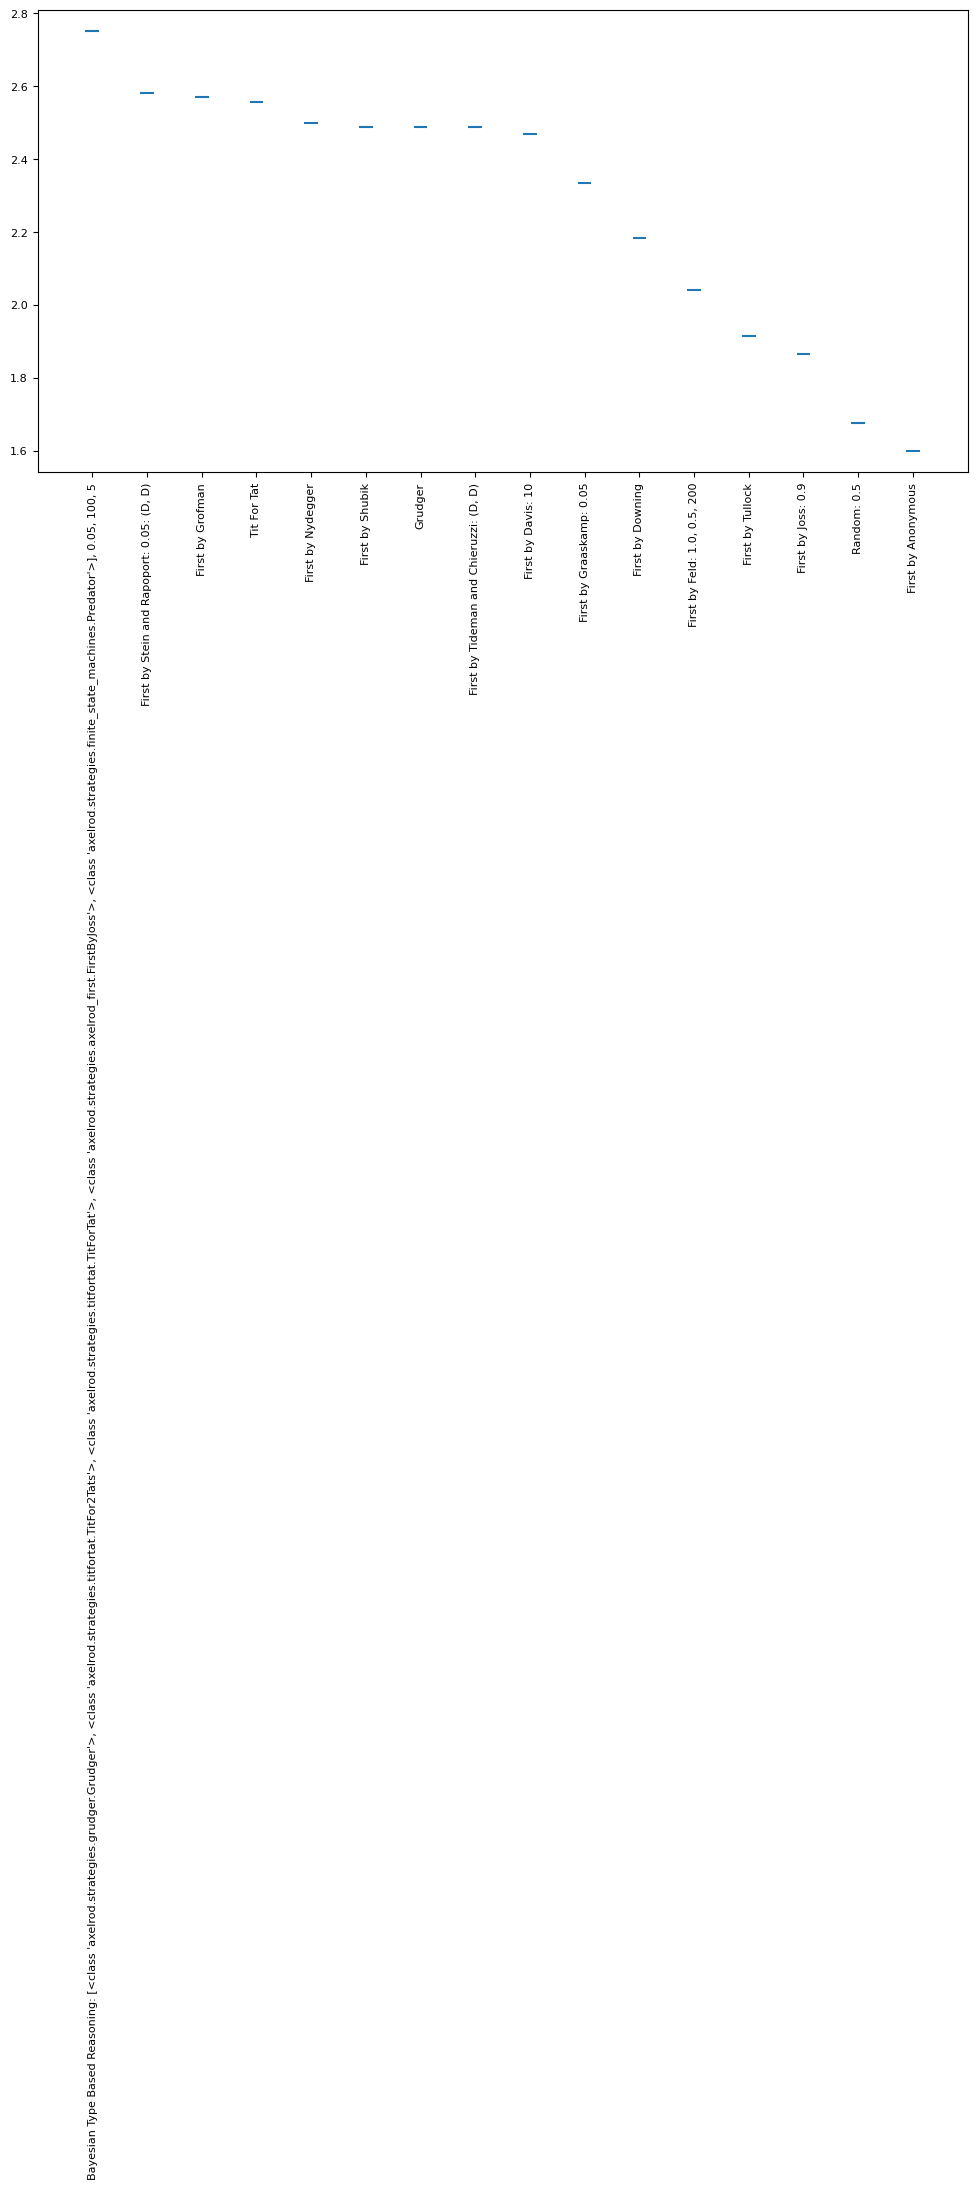

In [51]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [17]:
results.summarise()

[Player(Rank=0, Name="Bayesian Type Based Reasoning: [<class 'axelrod.strategies.titfortat.TitForTat'>, <class 'axelrod.strategies.axelrod_first.FirstByTidemanAndChieruzzi'>, <class 'axelrod.strategies.axelrod_first.FirstByNydegger'>, <class 'axelrod.strategies.axelrod_first.FirstByGrofman'>, <class 'axelrod.strategies.axelrod_first.FirstByShubik'>, <class 'axelrod.strategies.axelrod_first.FirstBySteinAndRapoport'>, <class 'axelrod.strategies.grudger.Grudger'>, <class 'axelrod.strategies.axelrod_first.FirstByDavis'>, <class 'axelrod.strategies.axelrod_first.FirstByGraaskamp'>, <class 'axelrod.strategies.axelrod_first.FirstByDowning'>, <class 'axelrod.strategies.axelrod_first.FirstByFeld'>, <class 'axelrod.strategies.axelrod_first.FirstByJoss'>, <class 'axelrod.strategies.axelrod_first.FirstByTullock'>, <class 'axelrod.strategies.axelrod_first.FirstByAnonymous'>, <class 'axelrod.strategies.rand.Random'>], 0.05, 100, 5", Median_score=np.float64(2.951), Cooperation_rating=0.75666666666666

In [52]:
results.summarise()

[Player(Rank=0, Name="Bayesian Type Based Reasoning: [<class 'axelrod.strategies.grudger.Grudger'>, <class 'axelrod.strategies.titfortat.TitFor2Tats'>, <class 'axelrod.strategies.titfortat.TitForTat'>, <class 'axelrod.strategies.axelrod_first.FirstByJoss'>, <class 'axelrod.strategies.finite_state_machines.Predator'>], 0.05, 100, 5", Median_score=np.float64(2.7503333333333333), Cooperation_rating=0.804, Wins=np.float64(2.0), Initial_C_rate=np.float64(1.0), CC_rate=0.767, CD_rate=0.037000000000000005, DC_rate=0.06333333333333334, DD_rate=0.13266666666666668, CC_to_C_rate=np.float64(1.0), CD_to_C_rate=np.float64(0.787037037037037), DC_to_C_rate=np.float64(0.010757663389242337), DD_to_C_rate=np.float64(0.008265577255214561)),
 Player(Rank=1, Name='First by Stein and Rapoport: 0.05: (D, D)', Median_score=np.float64(2.581), Cooperation_rating=0.6273333333333333, Wins=np.float64(11.0), Initial_C_rate=np.float64(1.0), CC_rate=0.5863333333333334, CD_rate=0.040999999999999995, DC_rate=0.11233333

In [53]:
results.write_summary('first_tournament_features.csv')